In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


# PCA

## Principal Components: Singular Value Decomposition
build 3D data set

In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [3]:
X_centered = X-X.mean(axis=0)
U, s, V = np.linalg.svd(X_centered)

In [4]:
c1 = V.T[:,0]
c2 = V.T[:,1]

SVD assumes the original matrix is unitary (i.e. its inverse is also its conjugate-transpose). Since the training set is always real, it means that the inverse is its transpose. That means that the matrix is orthogonal. Hence SVD works on all traning sets

In [5]:
#PCA onto the first two principal components
W2 = V.T[:,:2]

In [6]:
X2D = X_centered.dot(W2)

In [7]:
#using Sci-kit learn
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

Some excellent explanation is in the jupyter notebook, check it out!

In [8]:
pca.components_#this gives you the principlal components

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [9]:
pca.explained_variance_ratio_

array([ 0.84248607,  0.14631839])

That tells you that 84% of the variance lies on the first axis, 14.6% lies on the second axis, which means that the third axis only carries <1.2%, which makes sense to leave out

## Choosing the Right Number of Dimensions

Usually get up to d dimensions such that 95% of the variance is captured

In [10]:
pca = PCA()

In [11]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
cumsum = np.cumsum(pca.explained_variance_ratio_) #cumulated sum

In [14]:
cumsum

array([ 0.0979085 ,  0.16935327,  0.230804  ,  0.28502235,  0.33412947,
        0.37720032,  0.40992705,  0.43886063,  0.46648008,  0.48986277,
        0.5109064 ,  0.53130397,  0.54837612,  0.56532983,  0.58112168,
        0.5959951 ,  0.60916632,  0.6219443 ,  0.63381242,  0.64532175,
        0.65596806,  0.66608542,  0.67568711,  0.68479722,  0.69358461,
        0.7019435 ,  0.70999732,  0.71785028,  0.72523488,  0.73211634,
        0.73868069,  0.74512797,  0.75113496,  0.75697298,  0.76264873,
        0.76807142,  0.77311152,  0.77795597,  0.78274618,  0.7873923 ,
        0.79193513,  0.79636749,  0.80053838,  0.8044898 ,  0.80830943,
        0.81206371,  0.81567123,  0.81917095,  0.8225571 ,  0.82575904,
        0.82892001,  0.83203043,  0.83498954,  0.83786134,  0.84067219,
        0.84336446,  0.84603577,  0.84861641,  0.85114857,  0.85359308,
        0.85598998,  0.85836448,  0.86064343,  0.86285353,  0.86498866,
        0.86705057,  0.86907432,  0.87100434,  0.87291233,  0.87

In [15]:
d = np.argmax(cumsum>=0.95)+1

In [16]:
d

154

In [17]:
#set n_component to be a float between 0 and 1, indicating the ratio of variance that you wish to preserve
pca = PCA(n_components=0.95)

In [18]:
X_reduced = pca.fit_transform(X_train)

In [19]:
pca.components_

array([[ -6.85403110e-21,  -8.23993651e-17,  -6.24500451e-17, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  6.84796852e-19,   2.22044605e-16,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -2.91018278e-20,  -4.51028104e-17,  -5.55111512e-17, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [ -1.02449824e-18,  -7.71951947e-17,   3.02709247e-16, ...,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [  4.64113634e-18,   5.89805982e-17,   5.55111512e-17, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  7.92439553e-18,  -2.77555756e-17,  -2.15105711e-16, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [20]:
pca.n_components_

154

In [21]:
np.sum(pca.explained_variance_ratio_)

0.95044630302001865

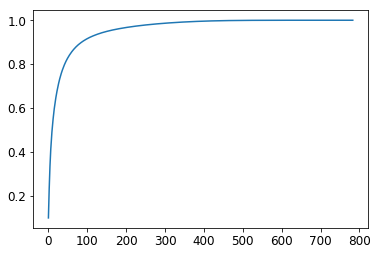

In [22]:
plt.plot(cumsum)

In [23]:
#can inverse transform back to the original
X_recovered = pca.inverse_transform(X_reduced)

In [24]:
X_recovered.shape

(52500, 784)

## Incremental PCA

In [25]:
n_batches = 100

In [26]:
from sklearn.decomposition import IncrementalPCA

In [27]:
inc_pca = IncrementalPCA(n_components=154)

In [28]:
for X_batch in np.array_split(X_train,n_batches):
    inc_pca.partial_fit(X_batch)

In [29]:
X_reduced_inc = inc_pca.transform(X_train)

In [30]:
np.allclose(X_reduced_inc,X_reduced)

False

In [31]:
#but mean is equal
np.allclose(pca.mean_, inc_pca.mean_)

True

## Randomized PCA

In [32]:
rnd_pca = PCA(n_components=154, svd_solver='randomized')

In [33]:
X_reduced_rnd = rnd_pca.fit_transform(X_train)

In [34]:
np.allclose(X_reduced,X_reduced_rnd)

False

In [35]:
np.allclose(pca.mean_,rnd_pca.mean_)

True

## Kernel PCA

In [36]:
from sklearn.decomposition import KernelPCA

In [37]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [38]:
rbf_pca = KernelPCA(n_components=2,kernel='rbf',gamma=0.04)

In [39]:
X_reduced_rbf = rbf_pca.fit_transform(X)

In [40]:
#pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [41]:
clf = Pipeline([
    ("kpca",KernelPCA(n_components=2)),
    ("log_reg",LogisticRegression())
    
])

In [42]:
param_grid = [{
        "kpca__gamma":np.linspace(0.03,0.05,10),
        "kpca__kernel":["rbf","sigmoid"]
}]

In [43]:
grid_search = GridSearchCV(clf,param_grid,cv=3)

In [44]:
y = t > 6.9
grid_search.fit(X,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg', LogisticRegre...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kpca__gamma': array([ 0.03   ,  0.03222,  0.03444,  0.03667,  0.03889,  0.04111,
        0.04333,  0.04556,  0.04778,  0.05   ]), 'kpca__kernel': ['rbf', 'sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [46]:
#reconstruction of pre-image
rbf_pca = KernelPCA(n_components=2, kernel='rbf',gamma=0.0433,fit_inverse_transform=True)

In [47]:
X_reduced = rbf_pca.fit_transform(X)

In [48]:
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X,X_preimage)

32.786308795766139

In [50]:
#how to minimize this error with GridSearch? With a loop?

## Locally Linear Embedding (LLE)

In [51]:
from sklearn.manifold import LocallyLinearEmbedding

In [52]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)

In [53]:
X_reduced = lle.fit_transform(X)

# Exercises

## MNIST and PCA

In [54]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=60000)

/home/jfyu/anaconda2/envs/mlbook/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [56]:
X_train.shape

(60000, 784)

In [57]:
X_test.shape

(10000, 784)

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier(random_state=42)

In [61]:
import time

t0 = time.time()
rfc_clf.fit(X_train, y_train)
t1 = time.time()

In [64]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 4.28s


In [77]:
from sklearn.metrics import accuracy_score

y_pred = rfc_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.94430000000000003

In [69]:
pca=PCA(n_components=0.95)

In [71]:
X_reduced = pca.fit_transform(X_train)

In [72]:
rfc_clf2 = RandomForestClassifier(random_state=42)

In [73]:
t0 = time.time()
rfc_clf2.fit(X_reduced, y_train)
t1 = time.time()

In [74]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 10.76s


In [78]:
X_test_reduced = pca.transform(X_test)

y_pred = rfc_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.89239999999999997

See actual notebook. Check with softmax

In [79]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

In [80]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 13.76s


In [81]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.91830000000000001

In [83]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf2.fit(X_reduced, y_train)
t1 = time.time()

In [84]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 6.33s


In [85]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.91190000000000004

## t-SNE

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)